In [2]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
import numpy as np
import os
import seaborn as sns
from sklearn import ensemble, tree, linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


from scipy import stats
from scipy.stats import norm, skew #for some statistics


# pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
# from subprocess import check_output



In [3]:
train= pd.read_csv('Downloads/boston-house-prices/train.csv')
test= pd.read_csv('Downloads/boston-house-prices/test.csv')

In [4]:
train.shape

(1460, 81)

In [5]:
test.shape

(1459, 80)

In [6]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
print("The train data size before dropping Id feature is :{} ".format(train.shape))
print("The test data size before dropping Id feature is :{}".format(test.shape))

The train data size before dropping Id feature is :(1460, 81) 
The test data size before dropping Id feature is :(1459, 80)


In [9]:
train_ID=train['Id']

In [10]:
train_ID

0          1
1          2
2          3
3          4
4          5
5          6
6          7
7          8
8          9
9         10
10        11
11        12
12        13
13        14
14        15
15        16
16        17
17        18
18        19
19        20
20        21
21        22
22        23
23        24
24        25
25        26
26        27
27        28
28        29
29        30
        ... 
1430    1431
1431    1432
1432    1433
1433    1434
1434    1435
1435    1436
1436    1437
1437    1438
1438    1439
1439    1440
1440    1441
1441    1442
1442    1443
1443    1444
1444    1445
1445    1446
1446    1447
1447    1448
1448    1449
1449    1450
1450    1451
1451    1452
1452    1453
1453    1454
1454    1455
1455    1456
1456    1457
1457    1458
1458    1459
1459    1460
Name: Id, Length: 1460, dtype: int64

In [11]:
test_ID=test['Id']

In [12]:
test_ID

0       1461
1       1462
2       1463
3       1464
4       1465
5       1466
6       1467
7       1468
8       1469
9       1470
10      1471
11      1472
12      1473
13      1474
14      1475
15      1476
16      1477
17      1478
18      1479
19      1480
20      1481
21      1482
22      1483
23      1484
24      1485
25      1486
26      1487
27      1488
28      1489
29      1490
        ... 
1429    2890
1430    2891
1431    2892
1432    2893
1433    2894
1434    2895
1435    2896
1436    2897
1437    2898
1438    2899
1439    2900
1440    2901
1441    2902
1442    2903
1443    2904
1444    2905
1445    2906
1446    2907
1447    2908
1448    2909
1449    2910
1450    2911
1451    2912
1452    2913
1453    2914
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [13]:
train.drop("Id",axis=1,inplace=True)

In [14]:
test.drop("Id",axis=1,inplace=True)

In [15]:
print("The train data size after dropping Id feature is:{}".format(train.shape))
print("The train data size after dropping Id feature is:{}".format(test.shape))

The train data size after dropping Id feature is:(1460, 80)
The train data size after dropping Id feature is:(1459, 79)


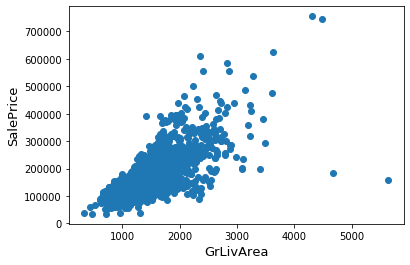

In [16]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


In [17]:
train=train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

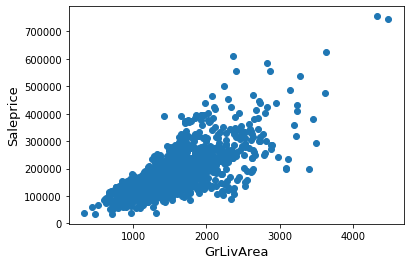

In [18]:
fig,ax=plt.subplots()
ax.scatter(x=train['GrLivArea'],y=train['SalePrice'])
plt.ylabel('Saleprice',fontsize=13)
plt.xlabel('GrLivArea',fontsize=13)
plt.show()


 mu = 180932.92 and sigma = 79467.79



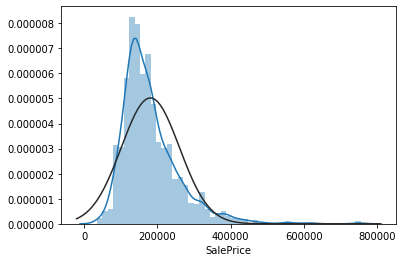

In [19]:
sns.distplot(train['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

Text(0.5, 1.0, 'SalePrice distribution')

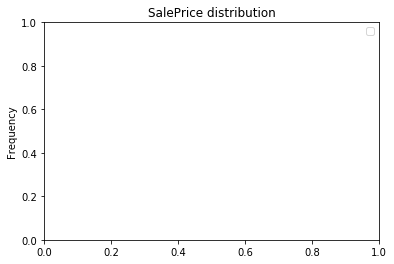

In [20]:
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

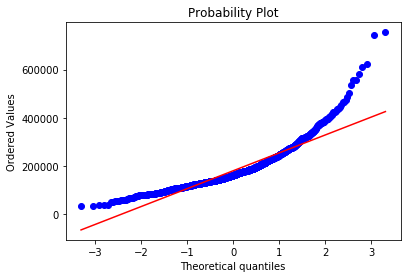

In [21]:
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



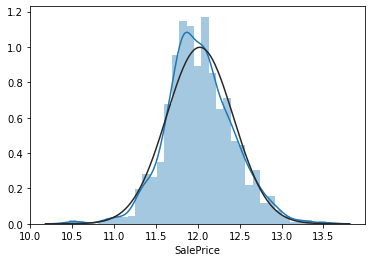

In [22]:
train["SalePrice"] = np.log1p(train["SalePrice"])

sns.distplot(train['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

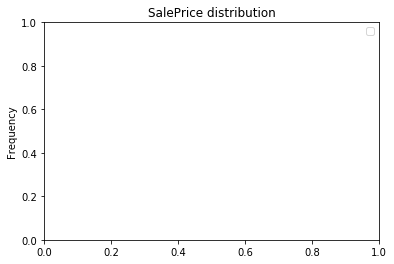

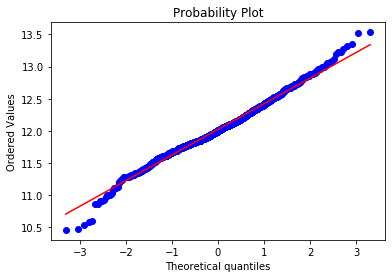

In [23]:
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [24]:
ntrain = train.shape[0]

In [25]:
ntrain

1458

In [26]:
ntest = test.shape[0]

In [27]:
ntest

1459

In [28]:
y_train = train.SalePrice

In [29]:
y_train

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
5       11.870607
6       12.634606
7       12.206078
8       11.774528
9       11.678448
10      11.771444
11      12.751303
12      11.877576
13      12.540761
14      11.964007
15      11.790565
16      11.911708
17      11.407576
18      11.976666
19      11.842236
20      12.692506
21      11.845110
22      12.345839
23      11.774528
24      11.944714
25      12.454108
26      11.811555
27      12.631344
28      12.242891
29      11.134604
          ...    
1430    12.165985
1431    11.875838
1432    11.074436
1433    12.136192
1434    11.982935
1435    12.066816
1436    11.699413
1437    12.885673
1438    11.916395
1439    12.190964
1440    12.160034
1441    11.913720
1442    12.644331
1443    11.703554
1444    12.098493
1445    11.767575
1446    11.969724
1447    12.388398
1448    11.626263
1449    11.429555
1450    11.820418
1451    12.567555
1452    11.884496
1453    11.344519
1454    12

In [30]:
y_train = train.SalePrice.values

In [31]:
all_data = pd.concat((train, test)).reset_index(drop=True)

In [32]:
all_data

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
5,796,566,320,NaN,1,1Fam,TA,No,732.0,0.0,...,WD,0,Pave,5,796.0,AllPub,40,1993,1995,2009
6,1694,0,0,NaN,3,1Fam,TA,Av,1369.0,0.0,...,WD,0,Pave,7,1686.0,AllPub,255,2004,2005,2007
7,1107,983,0,NaN,3,1Fam,TA,Mn,859.0,32.0,...,WD,0,Pave,7,1107.0,AllPub,235,1973,1973,2009
8,1022,752,0,NaN,2,1Fam,TA,No,0.0,0.0,...,WD,0,Pave,8,952.0,AllPub,90,1931,1950,2008
9,1077,0,0,NaN,2,2fmCon,TA,No,851.0,0.0,...,WD,0,Pave,5,991.0,AllPub,0,1939,1950,2008


In [33]:
all_data.drop(['SalePrice'], axis=1, inplace=True)

In [34]:
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


In [35]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100

In [36]:
all_data_na

1stFlrSF          0.000000
2ndFlrSF          0.000000
3SsnPorch         0.000000
Alley            93.212204
BedroomAbvGr      0.000000
BldgType          0.000000
BsmtCond          2.811107
BsmtExposure      2.811107
BsmtFinSF1        0.034282
BsmtFinSF2        0.034282
BsmtFinType1      2.708262
BsmtFinType2      2.742544
BsmtFullBath      0.068564
BsmtHalfBath      0.068564
BsmtQual          2.776826
BsmtUnfSF         0.034282
CentralAir        0.000000
Condition1        0.000000
Condition2        0.000000
Electrical        0.034282
EnclosedPorch     0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior1st       0.034282
Exterior2nd       0.034282
Fence            80.425094
FireplaceQu      48.680151
Fireplaces        0.000000
Foundation        0.000000
FullBath          0.000000
                   ...    
LotFrontage      16.660953
LotShape          0.000000
LowQualFinSF      0.000000
MSSubClass        0.000000
MSZoning          0.137127
MasVnrArea        0.788481
M

In [37]:
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]

In [38]:
all_data_na

PoolQC          99.691464
MiscFeature     96.400411
Alley           93.212204
Fence           80.425094
FireplaceQu     48.680151
LotFrontage     16.660953
GarageQual       5.450806
GarageCond       5.450806
GarageFinish     5.450806
GarageYrBlt      5.450806
GarageType       5.382242
BsmtExposure     2.811107
BsmtCond         2.811107
BsmtQual         2.776826
BsmtFinType2     2.742544
BsmtFinType1     2.708262
MasVnrType       0.822763
MasVnrArea       0.788481
MSZoning         0.137127
BsmtFullBath     0.068564
BsmtHalfBath     0.068564
Utilities        0.068564
Functional       0.068564
Electrical       0.034282
BsmtUnfSF        0.034282
Exterior1st      0.034282
Exterior2nd      0.034282
TotalBsmtSF      0.034282
GarageArea       0.034282
GarageCars       0.034282
dtype: float64

In [39]:
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})

In [40]:
missing_data.head(50)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


Text(0.5, 1.0, 'Percent missing data by feature')

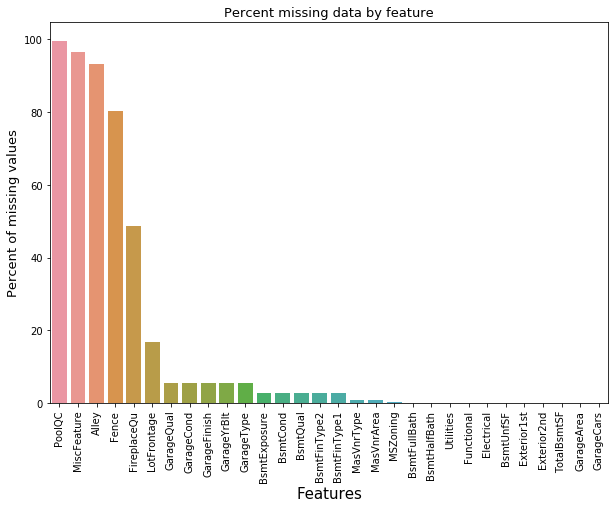

In [41]:
f, ax = plt.subplots(figsize=(10, 7))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=13)
plt.title('Percent missing data by feature', fontsize=13)

In [42]:
corrmat = train.corr()

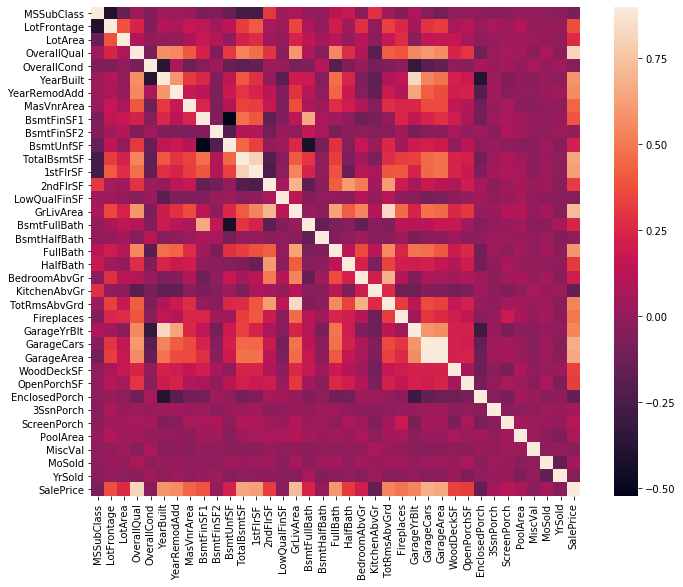

In [43]:
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [44]:
 all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

In [45]:
all_data["PoolQC"]

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
2887    None
2888    None
2889    None
2890    None
2891    None
2892    None
2893    None
2894    None
2895    None
2896    None
2897    None
2898    None
2899    None
2900    None
2901    None
2902    None
2903    None
2904    None
2905    None
2906    None
2907    None
2908    None
2909    None
2910    None
2911    None
2912    None
2913    None
2914    None
2915    None
2916    None
Name: PoolQC, Length: 2917, dtype: object

In [46]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [47]:
 all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [48]:
all_data["LotFrontage"]

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
5        85.0
6        75.0
7        80.0
8        51.0
9        50.0
10       70.0
11       85.0
12       72.0
13       91.0
14       73.0
15       51.0
16       73.0
17       72.0
18       66.0
19       70.0
20      101.0
21       57.0
22       75.0
23       44.0
24       72.0
25      110.0
26       60.0
27       98.0
28       47.0
29       60.0
        ...  
2887     50.0
2888     75.0
2889     69.0
2890     50.0
2891     60.0
2892     41.0
2893     44.0
2894     69.0
2895     65.0
2896     70.0
2897    140.0
2898     82.0
2899     82.0
2900     95.0
2901     88.0
2902    125.0
2903     78.0
2904     41.0
2905     58.0
2906     74.0
2907     21.0
2908     21.0
2909     80.0
2910     21.0
2911     21.0
2912     21.0
2913     21.0
2914    160.0
2915     62.0
2916     74.0
Name: LotFrontage, Length: 2917, dtype: float64

In [49]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [50]:
all_data[col]

0         TA
1         TA
2         TA
3         TA
4         TA
5         TA
6         TA
7         TA
8         TA
9         TA
10        TA
11        TA
12        TA
13        TA
14        TA
15        TA
16        TA
17        TA
18        TA
19        TA
20        TA
21        TA
22        TA
23        TA
24        TA
25        TA
26        TA
27        TA
28        TA
29        TA
        ... 
2887      TA
2888      TA
2889    None
2890    None
2891    None
2892      TA
2893      TA
2894      TA
2895      TA
2896      TA
2897      TA
2898      TA
2899      TA
2900      TA
2901      TA
2902      TA
2903      TA
2904      TA
2905      TA
2906      TA
2907    None
2908      Fa
2909      TA
2910      TA
2911    None
2912    None
2913      TA
2914      TA
2915    None
2916      TA
Name: GarageCond, Length: 2917, dtype: object

In [51]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [52]:
all_data[col]

0       2.0
1       2.0
2       2.0
3       3.0
4       3.0
5       2.0
6       2.0
7       2.0
8       2.0
9       1.0
10      1.0
11      3.0
12      1.0
13      3.0
14      1.0
15      2.0
16      2.0
17      2.0
18      2.0
19      1.0
20      3.0
21      1.0
22      2.0
23      2.0
24      1.0
25      3.0
26      2.0
27      3.0
28      1.0
29      1.0
       ... 
2887    1.0
2888    1.0
2889    0.0
2890    0.0
2891    0.0
2892    2.0
2893    2.0
2894    2.0
2895    2.0
2896    2.0
2897    2.0
2898    2.0
2899    2.0
2900    3.0
2901    3.0
2902    1.0
2903    4.0
2904    1.0
2905    1.0
2906    3.0
2907    0.0
2908    1.0
2909    1.0
2910    1.0
2911    0.0
2912    0.0
2913    1.0
2914    2.0
2915    0.0
2916    3.0
Name: GarageCars, Length: 2917, dtype: float64

In [53]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [54]:
all_data[col]

0       0.0
1       1.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      1.0
27      0.0
28      0.0
29      0.0
       ... 
2887    0.0
2888    0.0
2889    0.0
2890    0.0
2891    0.0
2892    0.0
2893    1.0
2894    1.0
2895    0.0
2896    0.0
2897    0.0
2898    0.0
2899    0.0
2900    0.0
2901    0.0
2902    0.0
2903    0.0
2904    0.0
2905    0.0
2906    0.0
2907    0.0
2908    0.0
2909    0.0
2910    0.0
2911    0.0
2912    0.0
2913    0.0
2914    0.0
2915    1.0
2916    0.0
Name: BsmtHalfBath, Length: 2917, dtype: float64

In [55]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [56]:
all_data[col]

0        Unf
1        Unf
2        Unf
3        Unf
4        Unf
5        Unf
6        Unf
7        BLQ
8        Unf
9        Unf
10       Unf
11       Unf
12       Unf
13       Unf
14       Unf
15       Unf
16       Unf
17      None
18       Unf
19       Unf
20       Unf
21       Unf
22       Unf
23       Unf
24       ALQ
25       Unf
26       Rec
27       Unf
28       Unf
29       Unf
        ... 
2887     Unf
2888     Unf
2889    None
2890     Unf
2891     Unf
2892     Unf
2893     Unf
2894     Unf
2895     Unf
2896     Unf
2897     Unf
2898     Unf
2899     BLQ
2900     Unf
2901     Unf
2902    None
2903     Unf
2904     Unf
2905     Unf
2906     Unf
2907     Unf
2908     Unf
2909     BLQ
2910     Unf
2911     Unf
2912     Unf
2913     Unf
2914     Unf
2915     Unf
2916     Unf
Name: BsmtFinType2, Length: 2917, dtype: object

In [57]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [58]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [59]:
all_data['Electrical']

0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
5       SBrkr
6       SBrkr
7       SBrkr
8       FuseF
9       SBrkr
10      SBrkr
11      SBrkr
12      SBrkr
13      SBrkr
14      SBrkr
15      FuseA
16      SBrkr
17      SBrkr
18      SBrkr
19      SBrkr
20      SBrkr
21      FuseF
22      SBrkr
23      SBrkr
24      SBrkr
25      SBrkr
26      SBrkr
27      SBrkr
28      SBrkr
29      SBrkr
        ...  
2887    SBrkr
2888    SBrkr
2889    SBrkr
2890    SBrkr
2891    SBrkr
2892    SBrkr
2893    SBrkr
2894    SBrkr
2895    SBrkr
2896    SBrkr
2897    SBrkr
2898    SBrkr
2899    SBrkr
2900    SBrkr
2901    SBrkr
2902    FuseA
2903    SBrkr
2904    SBrkr
2905    SBrkr
2906    SBrkr
2907    SBrkr
2908    SBrkr
2909    SBrkr
2910    SBrkr
2911    SBrkr
2912    SBrkr
2913    SBrkr
2914    SBrkr
2915    SBrkr
2916    SBrkr
Name: Electrical, Length: 2917, dtype: object

In [60]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [61]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(5)

,Missing Ratio


In [62]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

In [63]:
all_data['MSSubClass']

0        60
1        20
2        60
3        70
4        60
5        50
6        20
7        60
8        50
9       190
10       20
11       60
12       20
13       20
14       20
15       45
16       20
17       90
18       20
19       20
20       60
21       45
22       20
23      120
24       20
25       20
26       20
27       20
28       20
29       30
       ... 
2887     30
2888     50
2889     30
2890    190
2891     50
2892    120
2893    120
2894     20
2895     90
2896     20
2897     80
2898     20
2899     20
2900     20
2901     20
2902     20
2903     90
2904    160
2905     20
2906     90
2907    180
2908    160
2909     20
2910    160
2911    160
2912    160
2913    160
2914     20
2915     85
2916     60
Name: MSSubClass, Length: 2917, dtype: object

In [64]:
#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

In [65]:
#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [66]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))


Shape all_data: (2917, 78)


In [67]:
#Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [68]:
all_data['TotalSF']

0       2566.0
1       2524.0
2       2706.0
3       2473.0
4       3343.0
5       2158.0
6       3380.0
7       3197.0
8       2726.0
9       2068.0
10      2080.0
11      3499.0
12      1824.0
13      2988.0
14      2506.0
15      1686.0
16      2008.0
17      1296.0
18      2228.0
19      2368.0
20      3534.0
21      1745.0
22      3572.0
23      2100.0
24      2120.0
25      3166.0
26      1800.0
27      3408.0
28      3084.0
29      1040.0
         ...  
2887    1282.0
2888    2605.0
2889     729.0
2890    2056.0
2891    1152.0
2892    3351.0
2893    3240.0
2894    3250.0
2895    3328.0
2896    2982.0
2897    2338.0
2898    3282.0
2899    2784.0
2900    3688.0
2901    3676.0
2902    1600.0
2903    2656.0
2904    1568.0
2905    1738.0
2906    3304.0
2907    1260.0
2908    1638.0
2909    2464.0
2910    1638.0
2911    1638.0
2912    1638.0
2913    1638.0
2914    2448.0
2915    1882.0
2916    2996.0
Name: TotalSF, Length: 2917, dtype: float64

In [318]:
# numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# # Check the skew of all numerical features
# skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
# print("\nSkew in numerical features: \n")
# skewness = pd.DataFrame({'Skew' :skewed_feats})
# skewness.head(10)

In [125]:
#leave as it is
# skewness = skewness[abs(skewness) > 0.75]
# print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

# from scipy.special import boxcox1p
# skewed_features = skewness.index
# lam = 0.15
# for feat in skewed_features:
#     #all_data[feat] += 1
#     all_data[feat] = boxcox1p(all_data[feat], lam)
    
# #all_data[skewed_features] = np.log1p(all_data[skewed_features])

In [69]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


In [70]:
train = all_data[:ntrain]

In [71]:
test = all_data[ntrain:]

In [72]:
train

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,856,854,0,1,3,4,3,706.0,0.0,2,...,0,0,0,0,0,0,0,0,0,1
1,1262,0,0,1,3,4,1,978.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
2,920,866,0,1,3,4,2,486.0,0.0,2,...,0,0,0,0,0,0,0,0,0,1
3,961,756,0,1,3,1,3,216.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
4,1145,1053,0,1,4,4,0,655.0,0.0,2,...,0,0,0,0,0,0,0,0,0,1
5,796,566,320,1,1,4,3,732.0,0.0,2,...,0,0,0,0,0,0,0,0,0,1
6,1694,0,0,1,3,4,0,1369.0,0.0,2,...,0,0,0,0,0,0,0,0,0,1
7,1107,983,0,1,3,4,2,859.0,32.0,0,...,0,0,0,0,0,0,0,0,0,1
8,1022,752,0,1,2,4,3,0.0,0.0,6,...,0,0,0,0,0,0,0,0,0,1
9,1077,0,0,1,2,4,3,851.0,0.0,2,...,0,0,0,0,0,0,0,0,0,1


In [73]:
test

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
1458,896,0,0,1,2,4,3,468.0,144.0,5,...,0,0,0,0,0,0,0,0,0,1
1459,1329,0,0,1,3,4,3,923.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
1460,928,701,0,1,3,4,3,791.0,0.0,2,...,0,0,0,0,0,0,0,0,0,1
1461,926,678,0,1,3,4,3,602.0,0.0,2,...,0,0,0,0,0,0,0,0,0,1
1462,1280,0,0,1,2,4,3,263.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
1463,763,892,0,1,3,4,3,0.0,0.0,6,...,0,0,0,0,0,0,0,0,0,1
1464,1187,0,0,1,3,4,3,935.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
1465,789,676,0,1,3,4,3,0.0,0.0,6,...,0,0,0,0,0,0,0,0,0,1
1466,1341,0,0,1,2,4,1,637.0,0.0,2,...,0,0,0,0,0,0,0,0,0,1
1467,882,0,0,1,2,4,3,804.0,78.0,0,...,0,0,0,0,0,0,0,0,0,1


In [101]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [102]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [103]:
 lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [104]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [105]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)


In [106]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [107]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1128 (0.0069)



In [108]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1129 (0.0070)



In [109]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.8593 (0.2885)



In [110]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1177 (0.0079)



In [111]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1166 (0.0074)



In [112]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1153 (0.0070)



In [113]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [115]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.2408 (0.0645)



In [116]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [117]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1089 (0.0070)


In [118]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [120]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.0766174294504209


In [121]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.07921548951417319


In [122]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.07247823724376089


In [123]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.07431900159416353


In [124]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [125]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission_boston.csv',index=False)